In [2]:
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from torchvision.transforms import (
    Compose,
    Resize,
    CenterCrop,
    Normalize,
    InterpolationMode,
    ToTensor,
)
import yaml

# BRAINSTORMING

In [13]:
res= 512

preprocess = Compose(
    [
        Resize(res, interpolation= InterpolationMode.BILINEAR), #getattr(InterpolationMode, config['processing']['interpolation'])),  # Smaller edge is resized to 256 preserving aspect ratio
        CenterCrop(res),  # Center crop to the desired squared resolution
        #ToFloat32Tensor(),  # Convert to tensor (0, 1)
        #Normalize(mean=[0.5], std=[0.5]),  # Map to (-1, 1) as a way to make data more similar to a Gaussian distribution
    ]
)

FIrst the image is cropped

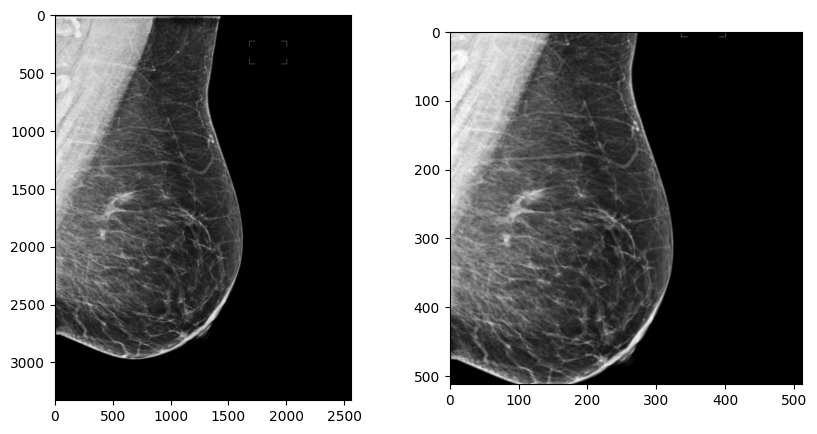

In [28]:
path_ex = repo_path / 'data/images/breast10p/1.2.826.0.1.3680043.9.3218.1.1.133376.8684.1511961897765.10235.0.png'
# read the image using PIL
im = Image.open(path_ex)
im_preprocessed = preprocess(im)
# convert to numpy array
im = np.array(im)
im_preprocessed = np.array(im_preprocessed)
# show the image
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(im, cmap='gray')
ax[1].imshow(im_preprocessed, cmap='gray')

Now we check how it looks when we switch the uint16 image to a uint8 image.<br>
Spoliler: No noticable change.

The original image has dtype int32 and the preprocessed image has dtype int32.
The dtype changed and now is uint8.


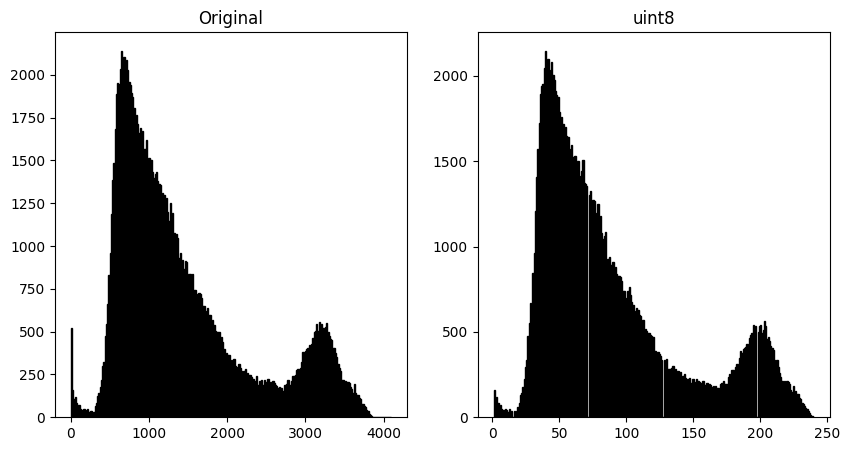

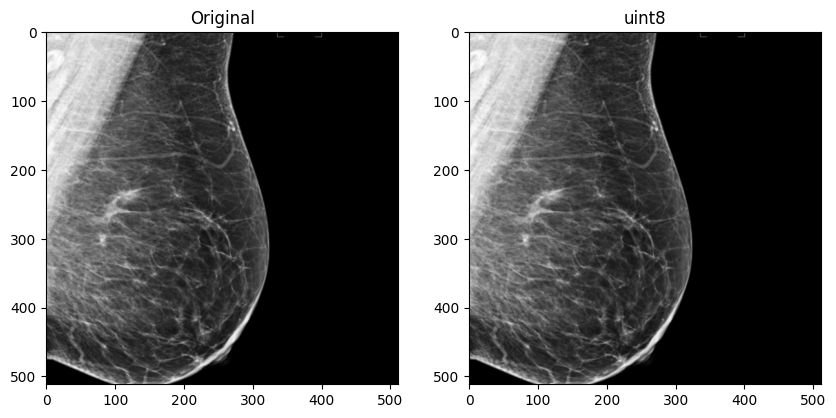

In [36]:
# get dtypes
print(f'The original image has dtype {im.dtype} and the preprocessed image has dtype {im_preprocessed.dtype}.')
# changed to uint8
im_uint8 = (im_preprocessed/ 4095.0)*255.0
im_uint8 = im_uint8.astype(np.uint8)
# show histogram of original and uint8 image
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(im_preprocessed.flatten(), bins=256, range=(1,im.max()), fc='k', ec='k')
ax[0].title.set_text('Original')
ax[1].hist(im_uint8.flatten(), bins=256, range=(1,im_uint8.max()), fc='k', ec='k')
ax[1].title.set_text('uint8')
# show images
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text('Original')
ax[0].imshow(im_preprocessed, cmap='gray')
ax[1].title.set_text('uint8')
ax[1].imshow(im_uint8, cmap='gray')
print(f'The dtype changed and now is {im_uint8.dtype}.')

How does a mammogram with RGB channels look like?<br>
Spiler: The same

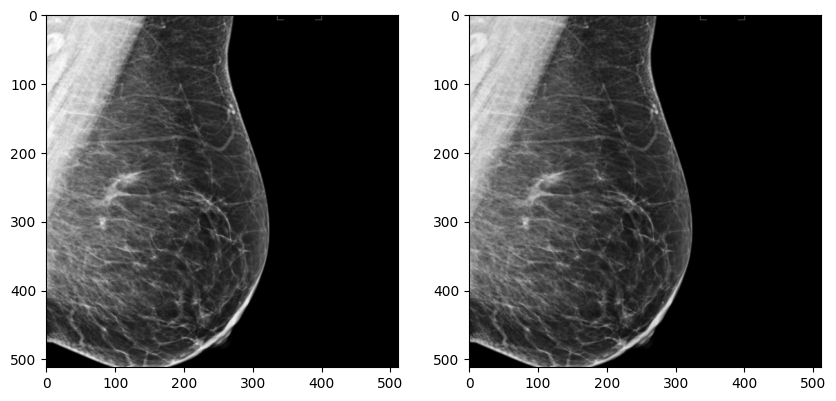

In [38]:
im_RGB = np.stack((im_uint8,)*3, axis=-1)
# show the image
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(im_uint8, cmap='gray')
ax[1].imshow(im_RGB)